In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import string

Učitavanje podataka za analizu

In [241]:
regular_season_results_df = pd.read_csv('data/regular_season_results.csv')
regular_season_results_df

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN
...,...,...,...,...,...,...,...,...
91219,S,132,592,61,640,60,N,0.0
91220,S,132,671,69,670,55,N,0.0
91221,S,132,779,65,825,61,N,0.0
91222,S,132,811,82,605,81,N,1.0


In [242]:
tourney_seeds_df = pd.read_csv('data/tourney_seeds.csv')
tourney_seeds_df

,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729
...,...,...,...
1237,S,Z12,689
1238,S,Z13,702
1239,S,Z14,811
1240,S,Z15,509


In [243]:
tourney_slots_df = pd.read_csv('data/tourney_slots.csv')
tourney_slots_df

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12
...,...,...,...,...
1218,S,R4Y1,R3Y1,R3Y2
1219,S,R4Z1,R3Z1,R3Z2
1220,S,R5WX,R4W1,R4X1
1221,S,R5YZ,R4Y1,R4Z1


Provjera null vrijednosti

In [244]:
def data_has_null_values(
        df: pd.DataFrame
) -> pd.DataFrame:
    to_return = {}

    for column in df:
        to_return[column] = [sum(df[column].isna())]

    return pd.DataFrame(to_return)

In [245]:
data_has_null_values(regular_season_results_df)

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,0,0,0,0,0,0,0,39891


In [246]:
data_has_null_values(tourney_slots_df)

,season,slot,strongseed,weakseed
0,0,0,0,0


In [247]:
data_has_null_values(tourney_seeds_df)

,season,seed,team
0,0,0,0


Ispis oblika tablica

In [248]:
regular_season_results_df.shape

(91224, 8)

In [249]:
tourney_slots_df.shape

(1223, 4)

In [250]:
tourney_seeds_df.shape

(1242, 3)

Stupci tablica

In [251]:
regular_season_results_df.columns.values

array(['season', 'daynum', 'wteam', 'wscore', 'lteam', 'lscore', 'wloc',
       'numot'], dtype=object)

In [252]:
tourney_seeds_df.columns.values

array(['season', 'seed', 'team'], dtype=object)

In [253]:
tourney_slots_df.columns.values

array(['season', 'slot', 'strongseed', 'weakseed'], dtype=object)

Opis tablica

Radi se samo za regular_season_result pošto ostale tablice nemaju numeričkih vrijednosti

In [254]:
regular_season_results_df.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


Ovdje su bitni stupci 'wscore' i 'lscore'.
Maksimalne vrijednosti navedenih tupaca se čine malo velike, ali nisu ne realne.

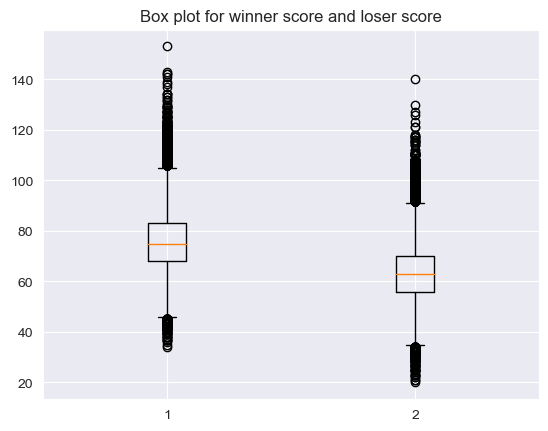

In [255]:
plt.boxplot(regular_season_results_df[['wscore', 'lscore']])
plt.title('Box plot for winner score and loser score')
plt.show()

Boxplot dijagram da postoji dosta outliera
Granice za outliere se mogu izračunati po sljedećim formulama:
IQR = Q3 - Q1
lower_limit = Q1 - 1.5IQR
upper_limit = Q3 + 1.5IQR

Vrijednosti Q1 i Q3 se mogu isčitati iz opisa tablice

In [256]:
WQ1 = 68.000000
WQ3 = 83.000000

WIQR = WQ3 - WQ1

winner_lower_limit = WQ1 - 1.5 * WIQR
winner_upper_limit = WQ3 + 1.5 * WIQR

print(f'{WIQR = }, {winner_lower_limit = }, {winner_upper_limit = }')

WIQR = 15.0, winner_lower_limit = 45.5, winner_upper_limit = 105.5


In [257]:
LQ1 = 56.000000
LQ3 = 70.000000

LIQR = WQ3 - WQ1

loser_lower_limit = LQ1 - 1.5 * LIQR
loser_upper_limit = LQ3 + 1.5 * LIQR

print(f'{LIQR = }, {loser_lower_limit = }, {loser_upper_limit = }')

LIQR = 15.0, loser_lower_limit = 33.5, loser_upper_limit = 92.5


S ovim granicama znamo koje podatke možemo odbaciti

In [258]:
winner_lower_count = len(regular_season_results_df.loc[regular_season_results_df['wscore'] < winner_lower_limit])
winner_upper_count = len(regular_season_results_df.loc[regular_season_results_df['wscore'] > winner_upper_limit])

print(f'{winner_lower_count = }, {winner_upper_count = }')

winner_lower_count = 157, winner_upper_count = 864


In [259]:
loser_lower_count = len(regular_season_results_df.loc[regular_season_results_df['lscore'] < loser_lower_limit])
loser_upper_count = len(regular_season_results_df.loc[regular_season_results_df['lscore'] > loser_upper_limit])

print(f'{loser_lower_count = }, {loser_upper_count = }')

loser_lower_count = 145, loser_upper_count = 668


In [260]:
print('Percentage of data removed:', (loser_upper_count + winner_lower_count) / len(regular_season_results_df) * 100, '%')

Percentage of data removed: 0.9043672717705866 %


Odbacivanjem podataka bi se izgubilo manje od 1% podataka.

In [261]:
regular_season_results_df = regular_season_results_df.loc[regular_season_results_df['lscore'] <= loser_upper_limit]
regular_season_results_df: pd.DataFrame = regular_season_results_df.loc[regular_season_results_df['wscore'] >= winner_lower_limit]

In [262]:
regular_season_results_df

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN
...,...,...,...,...,...,...,...,...
91219,S,132,592,61,640,60,N,0.0
91220,S,132,671,69,670,55,N,0.0
91221,S,132,779,65,825,61,N,0.0
91222,S,132,811,82,605,81,N,1.0


Indikacija monotonosti

In [263]:
regular_season_results_df.nunique()

season     19
daynum    134
wteam     356
wscore     94
lteam     356
lscore     73
wloc        3
numot       5
dtype: int64

nunique ne indicira da postoje monotone vrijednosti

Prosiječni rezultat pobjedničkog time

In [264]:
df = regular_season_results_df[['wteam', 'wscore']].groupby('wteam').mean()
df

,wscore
wteam,
501,80.000000
502,68.800000
503,75.317901
504,75.223529
505,75.871345
...,...
852,75.258065
853,77.926829
854,72.100000


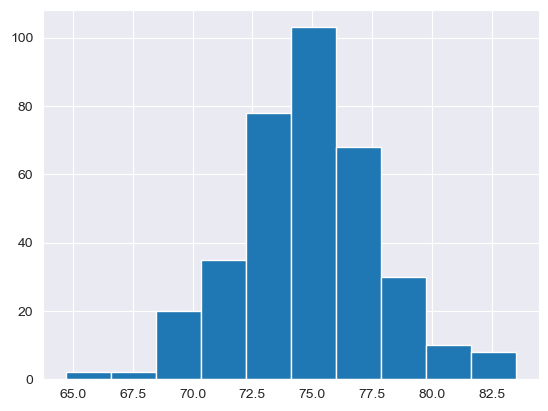

In [265]:
plt.hist(df)
plt.show()

In [266]:
df = regular_season_results_df[['wteam', 'wscore']].groupby('wteam').median()
df

,wscore
wteam,
501,80.0
502,68.0
503,75.0
504,75.0
505,74.0
...,...
852,75.0
853,77.0
854,72.0


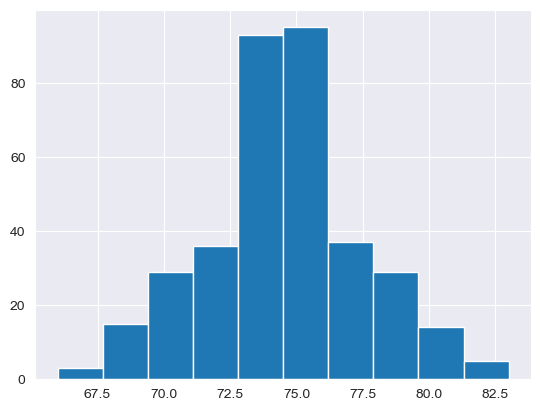

In [267]:
plt.hist(df)
plt.show()

Prosiječni rezultat gubitničkog time

In [268]:
df = regular_season_results_df[['lteam', 'lscore']].groupby('lteam').mean()
df

,lscore
lteam,
501,61.368421
502,58.215017
503,64.692308
504,63.708861
505,62.220408
...,...
852,64.324324
853,65.432749
854,60.342657


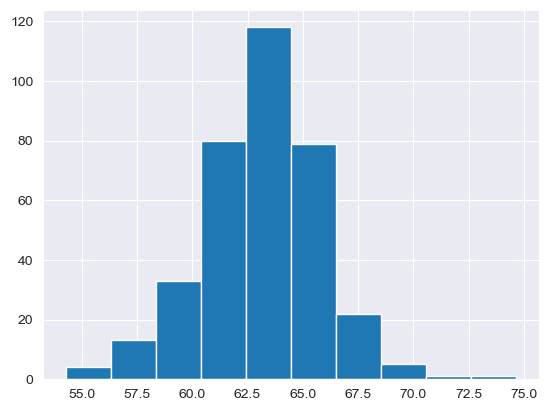

In [269]:
plt.hist(df)
plt.show()

In [270]:
df = regular_season_results_df[['lteam', 'lscore']].groupby('lteam').median()
df

,lscore
lteam,
501,60.0
502,58.0
503,63.0
504,63.0
505,62.0
...,...
852,65.0
853,65.0
854,60.0


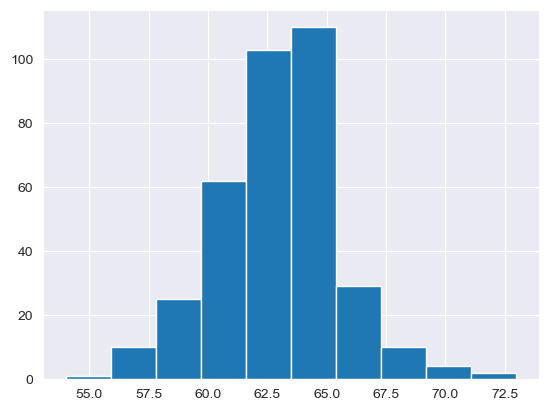

In [271]:
plt.hist(df)
plt.show()

In [272]:
df = regular_season_results_df[['season', 'wscore', 'lscore']].groupby('season').mean()
df

,wscore,lscore
season,,
A,77.785574,65.276465
B,76.224387,63.611833
C,76.997622,64.242806
D,76.065026,63.402694
E,76.157883,63.659773
F,76.994250,64.596860
G,76.787165,64.304883
H,75.640472,63.547697
I,74.863907,62.838141


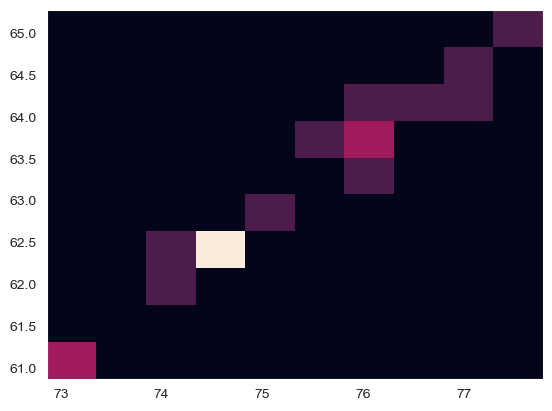

In [273]:
plt.hist2d(df['wscore'], df['lscore'])
plt.show()

In [274]:
df = regular_season_results_df[['season', 'wscore', 'lscore']].groupby('season').median()
df

,wscore,lscore
season,,
A,77.0,65.0
B,76.0,63.0
C,76.0,64.0
D,75.0,63.0
E,76.0,63.0
F,77.0,64.0
G,76.0,64.0
H,75.0,63.0
I,75.0,63.0


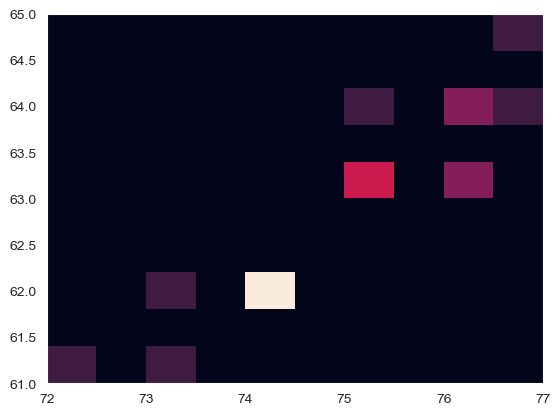

In [275]:
plt.hist2d(df['wscore'], df['lscore'])
plt.show()

Razlika bodova između pobjedničkog i gubitničkog tima

In [276]:
tmp_df = regular_season_results_df[['season', 'wscore', 'lscore']]
tmp_df['score_difference'] = tmp_df['wscore'] - tmp_df['lscore']
tmp_df = tmp_df[['season', 'score_difference']]
tmp_df

C:\Users\ivand\AppData\Local\Temp\ipykernel_8720\3544837593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['score_difference'] = tmp_df['wscore'] - tmp_df['lscore']


,season,score_difference
0,A,34
1,A,8
2,A,20
3,A,8
4,A,31
...,...,...
91219,S,1
91220,S,14
91221,S,4
91222,S,1


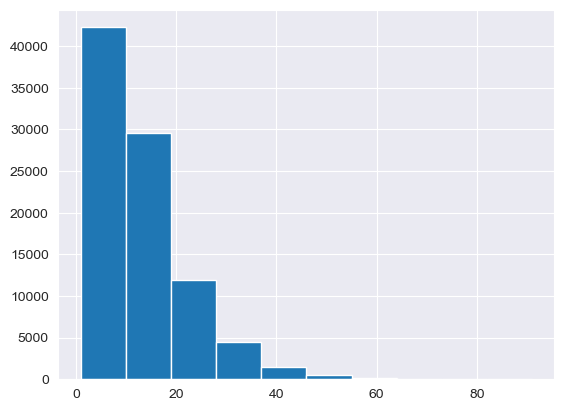

In [277]:
plt.hist(tmp_df['score_difference'])
plt.show()

In [278]:
df = tmp_df.groupby('season').mean()
df

,score_difference
season,
A,12.509109
B,12.612554
C,12.754816
D,12.662332
E,12.498110
F,12.397391
G,12.482282
H,12.092775
I,12.025765


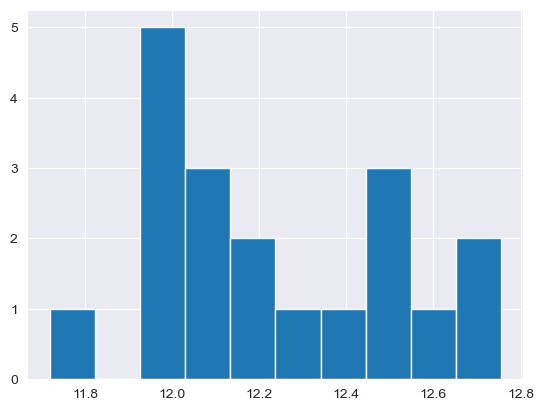

In [279]:
plt.hist(df)
plt.show()

In [280]:
df = tmp_df.groupby('season').median()
df

,score_difference
season,
A,11.0
B,11.0
C,11.0
D,11.0
E,10.0
F,10.0
G,10.0
H,10.0
I,10.0


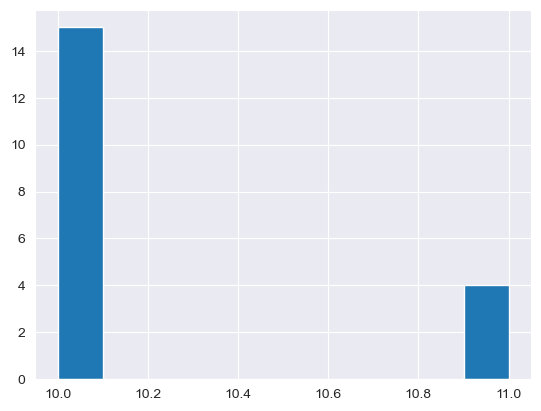

In [281]:
plt.hist(df)
plt.show()

In [282]:
tmp_df = regular_season_results_df[['season', 'wteam', 'wscore', 'lscore']]
tmp_df['score_difference'] = tmp_df['wscore'] - tmp_df['lscore']
tmp_df = tmp_df[['season', 'wteam', 'score_difference']]
tmp_df

C:\Users\ivand\AppData\Local\Temp\ipykernel_8720\2910738666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['score_difference'] = tmp_df['wscore'] - tmp_df['lscore']


,season,wteam,score_difference
0,A,511,34
1,A,515,8
2,A,606,20
3,A,670,8
4,A,721,31
...,...,...,...
91219,S,592,1
91220,S,671,14
91221,S,779,4
91222,S,811,1


In [283]:
df = tmp_df.groupby(['season', 'wteam']).mean()
df

score_difference
season wteam                  
A      502            7.500000
       503           14.500000
       504           10.000000
       506            3.285714
       508           10.666667
...                        ...
S      852           10.625000
       853           12.666667
       854            9.285714
       855            9.083333
       856            9.777778

[6278 rows x 1 columns]

In [284]:
tmp_df.groupby(['season', 'wteam']).median()

score_difference
season wteam                  
A      502                 7.5
       503                14.5
       504                 8.0
       506                 3.0
       508                 8.5
...                        ...
S      852                 8.0
       853                12.0
       854                 8.5
       855                 8.0
       856                11.0

[6278 rows x 1 columns]

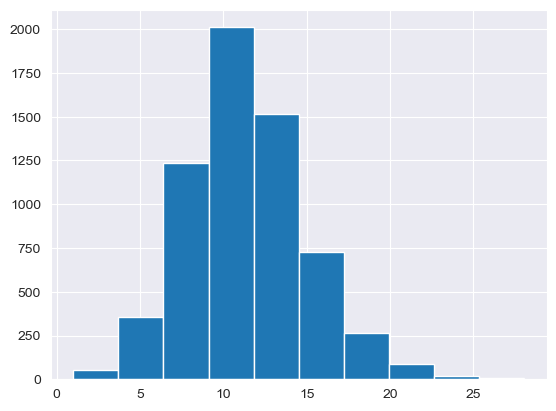

In [285]:
plt.hist(df)
plt.show()

Broj i postotak pobijeda i gubitaka tima

In [286]:
wteam_count_df = pd.DataFrame()
wteam_count_df[['wteam', 'count']] = [regular_season_results_df['wteam'], 1]

C:\Users\ivand\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
C:\Users\ivand\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [287]:
wteam_count_df = wteam_count_df.groupby('wteam', as_index=False).count()

In [288]:
lteam_count_df = pd.DataFrame()
lteam_count_df[['lteam', 'count']] = [regular_season_results_df['lteam'], 1]

C:\Users\ivand\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
C:\Users\ivand\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [289]:
lteam_count_df = lteam_count_df.groupby('lteam', as_index=False).count()

In [290]:
team_win_loss_count_df = wteam_count_df.merge(lteam_count_df, how='outer', left_on='wteam', right_on='lteam')
team_win_loss_count_df[['team', 'wcount', 'lcount']] = team_win_loss_count_df[['wteam', 'count_x', 'count_y']]
team_win_loss_count_df = team_win_loss_count_df[['team', 'wcount', 'lcount']]
team_win_loss_count_df['total_games'] = team_win_loss_count_df['wcount'] + team_win_loss_count_df['lcount']
team_win_loss_count_df['win_percentage'] = team_win_loss_count_df['wcount'] / team_win_loss_count_df['total_games']
team_win_loss_count_df['loss_percentage'] = team_win_loss_count_df['lcount'] / team_win_loss_count_df['total_games']
team_win_loss_count_df

,team,wcount,lcount,total_games,win_percentage,loss_percentage
0,501,2,19,21,0.095238,0.904762
1,502,215,293,508,0.423228,0.576772
2,503,324,234,558,0.580645,0.419355
3,504,340,237,577,0.589255,0.410745
4,505,171,245,416,0.411058,0.588942
...,...,...,...,...,...,...
351,852,279,259,538,0.518587,0.481413
352,853,410,171,581,0.705680,0.294320
353,854,220,286,506,0.434783,0.565217
354,855,184,335,519,0.354528,0.645472


In [291]:
tmp_df: pd.DataFrame = team_win_loss_count_df[['team', 'win_percentage']]
# tmp_df = tmp_df.astype({'team': 'string'})
tmp_df = tmp_df.sort_values(by=['win_percentage'])
tmp_df

,team,win_percentage
0,501,0.095238
183,684,0.171053
47,548,0.223077
83,584,0.223684
117,618,0.233333
...,...,...
285,786,0.752080
139,640,0.772047
106,607,0.792321
76,577,0.831405


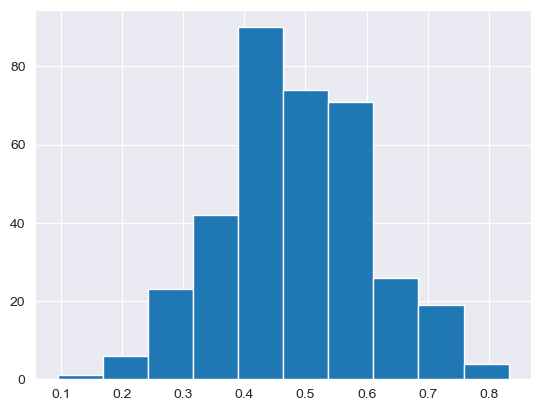

In [292]:
plt.hist(tmp_df['win_percentage'])

plt.show()

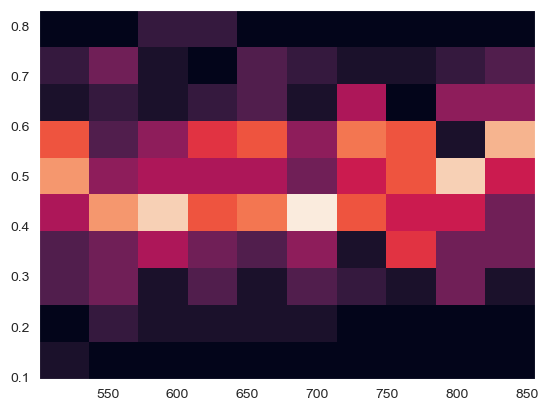

In [293]:
plt.hist2d(tmp_df['team'], tmp_df['win_percentage'])

plt.show()

In [294]:
tmp_df: pd.DataFrame = team_win_loss_count_df[['team', 'loss_percentage']]
# tmp_df = tmp_df.astype({'team': 'string'})
tmp_df = tmp_df.sort_values(by=['loss_percentage'])
tmp_df

,team,loss_percentage
135,636,0.167785
76,577,0.168595
106,607,0.207679
139,640,0.227953
285,786,0.247920
...,...,...
117,618,0.766667
83,584,0.776316
47,548,0.776923
183,684,0.828947


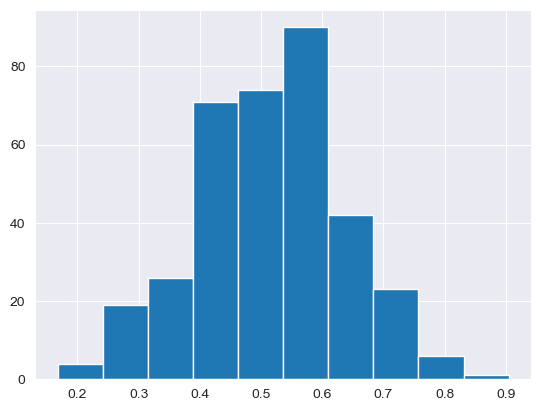

In [295]:
plt.hist(tmp_df['loss_percentage'])
plt.show()

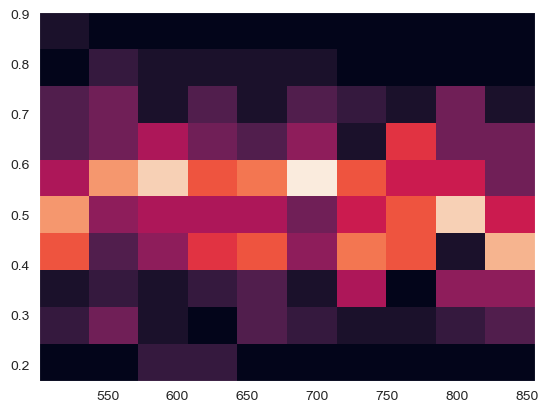

In [296]:
plt.hist2d(tmp_df['team'], tmp_df['loss_percentage'])

plt.show()

Čišćenje slotova

In [297]:
def remove_rounds(row: pd.Series) -> pd.Series:
    strong_seed: str = row['strongseed']
    weak_seed: str = row['weakseed']

    if len(strong_seed) > 3:
        strong_seed = strong_seed[2:]
        if len(strong_seed) < 3:
            strong_seed = strong_seed[0:1] + '0' + strong_seed[1:]

    if len(weak_seed) > 3:
        weak_seed = weak_seed[2:]
        if len(weak_seed) < 3:
            weak_seed = weak_seed[0:1] + '0' + weak_seed[1:]

    row['strongseed'] = strong_seed
    row['weakseed'] = weak_seed
    return row

In [298]:
tourney_slots_df = tourney_slots_df.apply(remove_rounds, axis=1)

In [299]:
season_seeds_dict = {i: tourney_seeds_df.loc[tourney_seeds_df['season'] == i] for i in list(tourney_seeds_df['season'])}

In [300]:
for season in season_seeds_dict:
    season_seeds_dict[season] = {i: j for i, j in zip(list(season_seeds_dict[season]['seed']), list(season_seeds_dict[season]['team']))}

In [301]:
season_slots_dict: dict[str, pd.DataFrame] = {i: tourney_slots_df.loc[tourney_slots_df['season'] == i] for i in list(tourney_slots_df['season'])}

In [302]:
for season in season_seeds_dict:
    season_slots_dict[season].replace(season_seeds_dict[season], inplace=True)

C:\Users\ivand\AppData\Local\Temp\ipykernel_8720\3591034457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_slots_dict[season].replace(season_seeds_dict[season], inplace=True)


In [315]:
tourney_slots_df = pd.concat(season_slots_dict.values())
tourney_slots_df: pd.DataFrame = tourney_slots_df.loc[~tourney_slots_df['slot'].str.startswith('R6')]
tourney_slots_df: pd.DataFrame = tourney_slots_df.loc[tourney_slots_df['strongseed'].str.endswith('a').isna()]
tourney_slots_df['slot'] = tourney_slots_df['slot'].str[1:2]
tourney_slots_df = tourney_slots_df.loc[tourney_slots_df['weakseed'].str.contains(string.ascii_letters).isna()]
tourney_slots_df

,season,slot,strongseed,weakseed
0,A,1,663,809
1,A,1,603,685
2,A,1,796,690
3,A,1,660,679
4,A,1,729,515
...,...,...,...,...
1217,S,4,592,636
1218,S,4,846,670
1219,S,4,511,849
1220,S,5,830,592


Analiza slotova

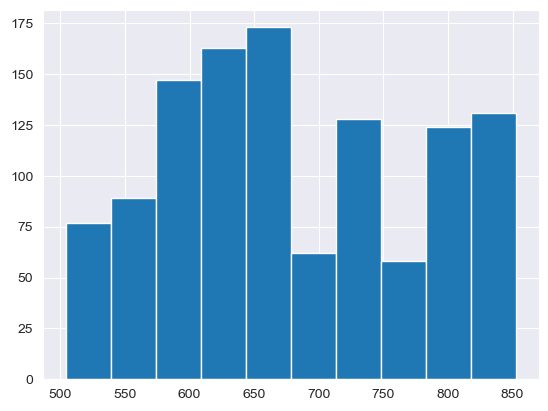

In [316]:
plt.hist(tourney_slots_df['strongseed'])
plt.show()

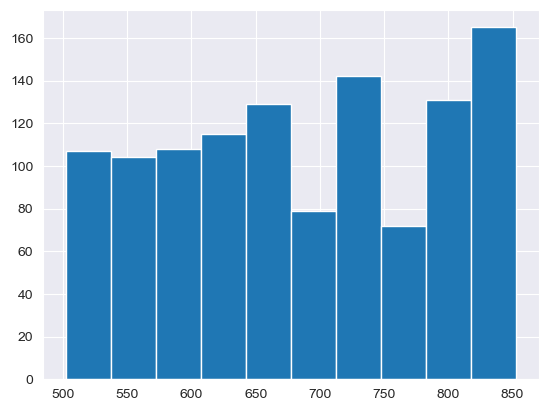

In [317]:
plt.hist(tourney_slots_df['weakseed'])
plt.show()